In [1]:
## Compute cooling fan percentage basing on audio cabinet power and temperature

In [2]:
import seaborn as sns
import numpy as np

In [3]:
def get_fan_percentage(power, temp):
    percent_by_power = power * 0.5
    percent_by_temp = temp * 5.0 - 125
    max1 = max(percent_by_power, percent_by_temp)
    max2 = max1 if max1 >= 30 else 0
    return min(max2, 100)

def get_fan_percentage_vect(Power, Temp):
    percent_by_power = Power * 0.5
    percent_by_temp = Temp * 5.0 - 125
    def get_const_percent(percent):
        return np.full_like(percent_by_power, percent)
    max1 = np.maximum(percent_by_power, percent_by_temp)
    max3 = np.where(max1 >= get_const_percent(30), max1, get_const_percent(0))
    return np.minimum(max3, get_const_percent(100))

In [4]:
Power = np.arange(200)
Temp = np.arange(50)
pv, tv = np.meshgrid(Power, Temp, indexing='xy')
FanPerc = get_fan_percentage_vect(pv, tv)
FanPerc.shape

(50, 200)

Text(50.722222222222214, 0.5, 'Temp')

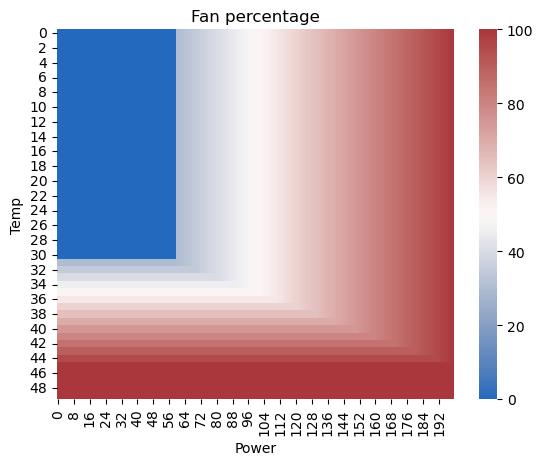

In [5]:
heatmap = sns.heatmap(FanPerc, cmap='vlag')
heatmap.set_title("Fan percentage")
heatmap.set_xlabel("Power")
heatmap.set_ylabel("Temp")

In [6]:
print(get_fan_percentage(power=76, temp=26))
print(get_fan_percentage_vect(Power=np.array(76), Temp=np.array(26)))

38.0
38.0
